<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/fat_data_pca_analysis_and_scree_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
원본 데이터 형태: (252, 18)

원본 데이터의 처음 5행:
   brozek  siri  density  age  weight  height  adipos   free  neck  chest  \
0    12.6  12.3   1.0708   23  154.25   67.75    23.7  134.9  36.2   93.1   
1     6.9   6.1   1.0853   22  173.25   72.25    23.4  161.3  38.5   93.6   
2    24.6  25.3   1.0414   22  154.00   66.25    24.7  116.0  34.0   95.8   
3    10.9  10.4   1.0751   26  184.75   72.25    24.9  164.7  37.4  101.8   
4    27.8  28.7   1.0340   24  184.25   71.25    25.6  133.1  34.4   97.3   

   abdom    hip  thigh  knee  ankle  biceps  forearm  wrist  
0   85.2   94.5   59.0  37.3   21.9    32.0     27.4   17.1  
1   83.0   98.7   58.7  37.3   23.4    30.5     28.9   18.2  
2   87.9   99.2   59.6  38.9   24.0    28.8     25.2   16.6  
3   86.4  101.2   60.1  37.3   22.8    32.4     29.4   18.2  
4  100.0  101.9   63.2  42.2   24.0    32.2     27.7   17.7  

Text(0, 0.5, 'Proportion of Variance')

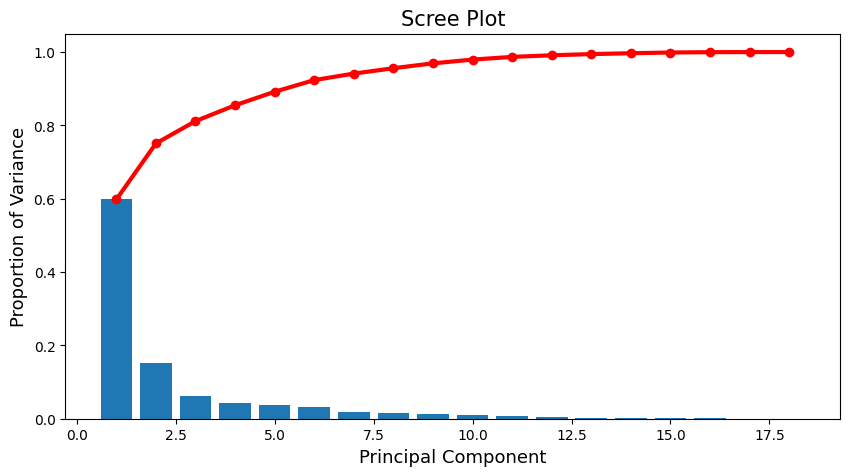

In [11]:
import os                                                           # Import operating system module
import numpy as np                                                  # Import NumPy for numerical operations
import pandas as pd                                                 # Import Pandas for data manipulation
import matplotlib.pyplot as plt                                     # Import Matplotlib for plotting
from sklearn import preprocessing                                   # Import preprocessing module from scikit-learn
from sklearn.decomposition import PCA                               # Import PCA from scikit-learn
from google.colab import drive                                      # Import Google Drive module for Colab

# Google Drive 마운트
drive.mount('/content/drive')                                       # Mount Google Drive to access files

# 데이터 파일 경로 설정
data_folder = '/content/drive/My Drive/Colab Notebooks'             # Set the data folder path
data_file = os.path.join(data_folder, 'fat.csv')                    # Create the full path to the data file

# CSV 파일 읽기
try:
    fat = pd.read_csv(data_file)                                    # Read the CSV file into a DataFrame
    print("원본 데이터 형태:", fat.shape)                              # Print the shape of the original data
    print("\n원본 데이터의 처음 5행:")                                  # Print a message
    print(fat.head())                                               # Display the first 5 rows of the original data
except Exception as e:
    print(f"파일 읽기 오류: {e}")                                      # Print error message if file reading fails
    raise                                                           # Raise the exception

# 특성 이름 정의
feature_names = ['brozek', 'siri', 'density', 'age', 'weight',      # Define the feature names
                 'height', 'adipos', 'free', 'neck', 'chest',
                 'abdom', 'hip', 'thigh', 'knee', 'ankle', 'biceps',
                 'forearm', 'wrist']

# 데이터 표준화
scaler = preprocessing.StandardScaler()                             # Create a StandardScaler object
fat_st = scaler.fit_transform(fat[feature_names])                   # Standardize the data

# 표준화된 데이터를 DataFrame으로 변환
fat_st = pd.DataFrame(fat_st, columns=feature_names)                # Convert standardized data to DataFrame
print("\n표준화된 데이터의 처음 5행:")                                  # Print a message
print(fat_st.head())                                                # Display the first 5 rows of standardized data

# PCA 수행 (18개 주성분)
pca = PCA(n_components=18)                                          # Create a PCA object with 18 components
pca_components = pca.fit_transform(fat_st)                          # Perform PCA on standardized data

# PCA 결과를 DataFrame으로 변환
pca_column_names = [f'pc{i}' for i in range(1, 19)]                 # Create column names for PCA results
pca_fat = pd.DataFrame(data=pca_components, columns=pca_column_names) # Convert PCA results to DataFrame

print("\nPCA 결과의 처음 5행:")                                       # Print a message
print(pca_fat.head())                                               # Display the first 5 rows of PCA results

# Scree Plot 생성
fig = plt.figure(figsize=(10, 5))                                   # Create a new figure with specified size
sing_vals = np.arange(18) + 1                                       # Create x-axis values for the plot
vals = pca.explained_variance_ratio_                                # Get explained variance ratios
cumvals = np.cumsum(vals)                                           # Calculate cumulative explained variance

plt.bar(sing_vals, vals)                                            # Create a bar plot of explained variance ratios
plt.plot(sing_vals, cumvals, 'ro-', linewidth=3)                    # Plot cumulative explained variance
plt.title('Scree Plot', fontsize=15)                                # Set the title of the plot
plt.xlabel('Principal Component', fontsize=13)                      # Set the x-axis label
plt.ylabel('Proportion of Variance', fontsize=13)                   # Set the y-axis label